In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [106]:
ticker = "AMZN"
start = "2018-04-01"
end = "2023-12-21"

In [107]:
df = yf.download(ticker, start=start, end=end)
df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-07,146.149994,147.919998,145.339996,146.880005,146.880005,52352800
2023-12-08,145.479996,147.839996,145.399994,147.419998,147.419998,41858000
2023-12-11,145.660004,146.190002,143.639999,145.889999,145.889999,50907300
2023-12-12,145.520004,147.500000,145.300003,147.479996,147.479996,44944300
2023-12-13,148.119995,149.460007,146.820007,148.839996,148.839996,52766200
2023-12-14,149.929993,150.539993,145.520004,147.419998,147.419998,58400800
2023-12-15,148.380005,150.570007,147.880005,149.970001,149.970001,110039100
2023-12-18,150.559998,154.850006,150.050003,154.070007,154.070007,62512800
2023-12-19,154.399994,155.119995,152.690002,153.789993,153.789993,43171300


In [108]:
data = df['Close']
# print(data)
print(data.values.shape)
scaler = MinMaxScaler()
data = scaler.fit_transform(data.values.reshape(-1, 1))
# print(data)

(1442,)


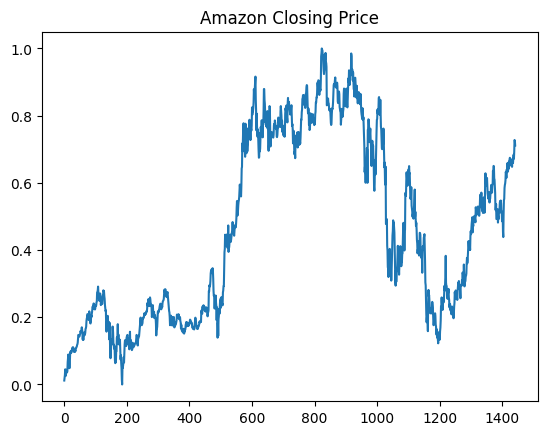

In [109]:
plt.plot(data)
plt.title('Amazon Closing Price')
plt.show()

In [110]:
training_data_len = int(len(data) * 0.8)
# print(training_data_len)
training_data = data[0:training_data_len, :]
testing_data = data[training_data_len:, :]

len(training_data), len(testing_data)

(1153, 289)

In [111]:
past_values = 1

def create_training_data(data, past_values):
    if len(data) < past_values:
        return np.array([]), np.array([])
    X_train = []
    y_train = []
    for i in range(past_values, len(data)):
        X_train.append(data[i-past_values:i, 0])
        y_train.append(data[i, 0])
    return np.array(X_train), np.array(y_train)

X_train, y_train = create_training_data(training_data, past_values)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test_1, y_test = create_training_data(testing_data, past_values)
X_test = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))

In [112]:
X_train.shape

(1152, 1, 1)

In [113]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

Epoch 1/200
6/6 [==============================] - 14s 18ms/step - loss: 0.2848
Epoch 2/200
6/6 [==============================] - 0s 12ms/step - loss: 0.2262
Epoch 3/200
6/6 [==============================] - 0s 13ms/step - loss: 0.1665
Epoch 4/200
6/6 [==============================] - 0s 13ms/step - loss: 0.1122
Epoch 5/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0737
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0652
Epoch 7/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0660
Epoch 8/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0551
Epoch 9/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0474
Epoch 10/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0390
Epoch 11/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0288
Epoch 12/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0193
Epoch 13/200
6/6 [==============================]

6/6 [==============================] - 0s 19ms/step - loss: 5.5682e-04
Epoch 100/200
6/6 [==============================] - 0s 10ms/step - loss: 5.5114e-04
Epoch 101/200
6/6 [==============================] - 0s 15ms/step - loss: 5.4709e-04
Epoch 102/200
6/6 [==============================] - 0s 13ms/step - loss: 5.4482e-04
Epoch 103/200
6/6 [==============================] - 0s 13ms/step - loss: 5.4601e-04
Epoch 104/200
6/6 [==============================] - 0s 13ms/step - loss: 5.5287e-04
Epoch 105/200
6/6 [==============================] - 0s 13ms/step - loss: 5.5037e-04
Epoch 106/200
6/6 [==============================] - 0s 13ms/step - loss: 5.3957e-04
Epoch 107/200
6/6 [==============================] - 0s 13ms/step - loss: 5.4392e-04
Epoch 108/200
6/6 [==============================] - 0s 15ms/step - loss: 5.4940e-04
Epoch 109/200
6/6 [==============================] - 0s 15ms/step - loss: 5.5173e-04
Epoch 110/200
6/6 [==============================] - 0s 15ms/step - loss: 5.430

6/6 [==============================] - 0s 11ms/step - loss: 5.6900e-04
Epoch 196/200
6/6 [==============================] - 0s 13ms/step - loss: 5.4680e-04
Epoch 197/200
6/6 [==============================] - 0s 15ms/step - loss: 5.3774e-04
Epoch 198/200
6/6 [==============================] - 0s 13ms/step - loss: 5.5340e-04
Epoch 199/200
6/6 [==============================] - 0s 18ms/step - loss: 5.4618e-04
Epoch 200/200
6/6 [==============================] - 0s 15ms/step - loss: 5.5625e-04


In [114]:
pred_train = model.predict(X_train)
pred = model.predict(X_test)

9/9 [==============================] - 0s 5ms/step


In [115]:
pred_train = scaler.inverse_transform(pred_train)
pred = scaler.inverse_transform(pred)
y_test = scaler.inverse_transform([y_test])
y_train = scaler.inverse_transform([y_train])

In [116]:
y_test = y_test.flatten()
y_train = y_train.flatten()

Training Error
Mean Absolute Error (MAE): 1.997702373398675
Root Mean Squared Error (RMSE): 2.8346433093298504


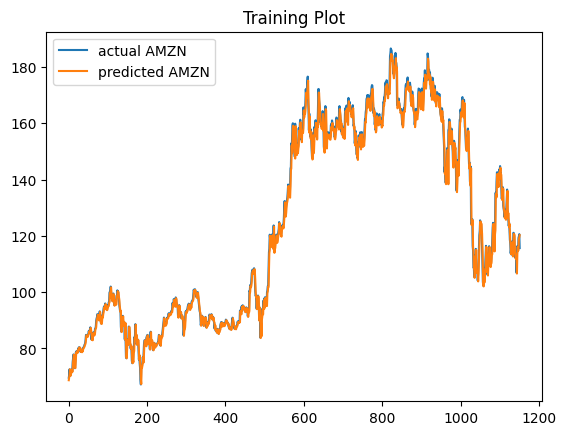

In [117]:
print("Training Error")
mae = mean_absolute_error(y_train, pred_train)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print("Root Mean Squared Error (RMSE):", rmse)
    
plt.plot(y_train, label = 'actual '+str(ticker))
plt.plot(pred_train, label = 'predicted '+str(ticker))
plt.title("Training Plot")
plt.legend()
plt.show()

Testing Error
Mean Absolute Error (MAE): 1.9647748470306396
Root Mean Squared Error (RMSE): 2.602590308812789


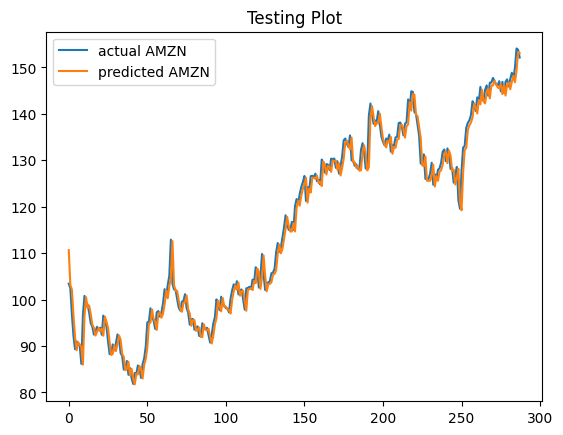

In [118]:
print("Testing Error")
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_test, pred))
print("Root Mean Squared Error (RMSE):", rmse)

plt.plot(y_test, label = 'actual '+str(ticker))
plt.plot(pred, label = 'predicted '+str(ticker))
plt.title("Testing Plot")
plt.legend()
plt.show()

## 10 days future prediction without correction

In [119]:
X_test[-20:].shape

(20, 1, 1)

In [120]:
X_test[-20:].reshape((20, past_values, 1)).shape

(20, 1, 1)

In [121]:
def predict_future(days, last_input):
    Output = []
#     i = 0
#     while(i<days):
#     print(f'loop runs {i} times')
#         print('before reshape',last_input)
    last_input = last_input.reshape((20, past_values, 1))
#         print('After Reshape',last_input)
    res = model.predict(last_input)
#         last_input = res
    Output.extend(res.tolist())
#         i=i+1
        
#     print(Output)
    Output = scaler.inverse_transform(Output)
#     print(Output)
    return Output
    
pred_without_correction = predict_future(1, X_test[-20:])
pred_without_correction = pred_without_correction.flatten()

1/1 [==============================] - 3s 3s/step


In [122]:
day=range(1,21)

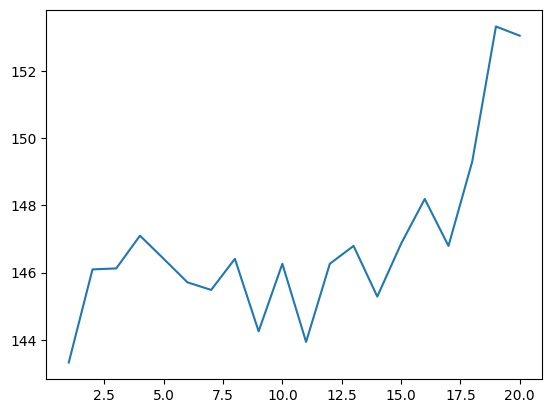

In [123]:
plt.plot(day,pred_without_correction)
plt.show()

In [124]:
# def predict_future(days, last_input):
#     Output = []
#     i = 0
#     while(i<days):
# #         print('before reshape',last_input)
#         last_input = last_input.reshape((60, past_values, 1))
# #         print('After Reshape',last_input)
#         res = model.predict(last_input)
# #         last_input = res
#         Output.extend(res.tolist())
#         i=i+1
        
#     print(Output)
#     Output = scaler.inverse_transform(Output)
#     print(Output)
#     return Output
    
# future_predictions_half = predict_future(1/2, X_test[-60:])
# future_predictions_half = future_predictions.flatten()

In [125]:
# def predict_future(days, last_input):
#     Output = []
#     i = 0
#     while(i<days):
# #         print('before reshape',last_input)
#         last_input = last_input.reshape((60, past_values, 1))
# #         print('After Reshape',last_input)
#         res = model.predict(last_input)
# #         last_input = res
#         Output.extend(res.tolist())
#         i=i+1
        
#     print(Output)
#     Output = scaler.inverse_transform(Output)
#     print(Output)
#     return Output
    
# future_predictions_2 = predict_future(2, X_test[-10:])
# future_predictions_2 = future_predictions.flatten()

# 10 days future predictions with one day correction

In [126]:
df = yf.download('AMZN', start='2023-10-05', end='2023-11-02')
df = df.reset_index(drop=True)
data = df['Close'].values

# print(data)

data = scaler.fit_transform(data.reshape(-1, 1))

pred_1Day_correction = []

for d in data:
#     print('Actual Price',d)
    inp = d.reshape((1,1,1))
    pred = model.predict(inp)
#     print('Predicted Price',pred)
    pred1 = scaler.inverse_transform(pred)
    pred_1Day_correction.extend(pred1.tolist())
#     print('Predicted Price after inverse scaler',pred1)

print(pred_1Day_correction)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 45ms/step
[[125.91328430175781], [127.90315246582031], [128.2012176513672], [129.41136169433594], [131.72869873046875], [132.21864318847656], [129.71823120117188], [132.4337921142578], [131.3751983642578], [128.07208251953125], [128.3402557373047], [125.126953125], [126.51052856445312], [128.49913024902344], [121.37818908691406], [119.59034729003906], [127.68446350097656], [132.59010314941406], [132.96075439453125], [136.7180633544922]]


In [127]:
day = range(1,21)

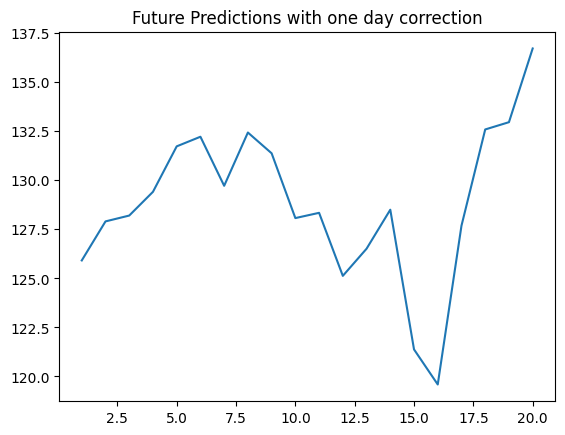

In [128]:
plt.title('Future Predictions with one day correction')
plt.plot(day,pred_1Day_correction)
plt.show()

# 10 days future predictions with two days correction

In [129]:
df = yf.download('AMZN', start='2023-10-05', end='2023-11-02')
# print(df)

data1 = df['Close'].values
# print(data1)

data = scaler.fit_transform(data1.reshape(-1, 1))
# print(data)

# print(data[0][0])
# print(data[1][0])

pred_2Days_correction = []
for d in range(len(data+2)):
    try:
        inp = np.array([data[d][0],data[d+1][0]])
        inp1 = inp.reshape((1,2,1))
#         pred = model.predict([inp1,inp2])
        pred = model.predict(inp1)
#         print(pred)
        pred = scaler.inverse_transform(pred)
        pred_2Days_correction.extend(pred.tolist())
#         print(output_list_2)
    except:
        print('error')

print(pred_2Days_correction)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 46ms/step
error
[[135.754638671875], [140.2580108642578], [142.0655517578125], [146.7908477783203], [151.91580200195312], [150.594970703125], [148.08096313476562], [152.54734802246094], [147.33953857421875], [140.74896240234375], [138.14511108398438], [132.677001953125], [137.61587524414062], [134.73016357421875], [117.54694366455078], [121.87680053710938], [144.0779266357422], [154.2908477783203], [158.32521057128906]]


In [130]:
day = range(1,20)

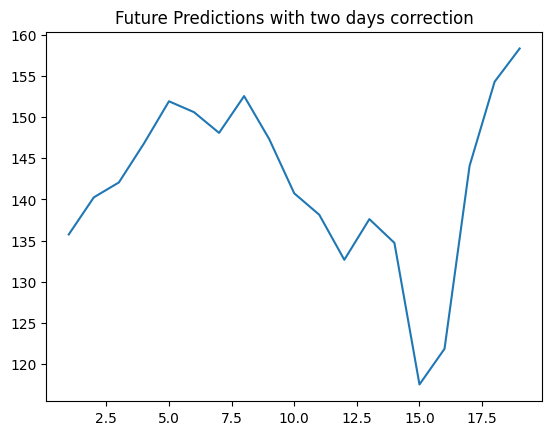

In [131]:
plt.title('Future Predictions with two days correction')
plt.plot(day,pred_2Days_correction)
plt.show()

In [138]:
ticker = "AMZN"
start='2023-12-20'
end='2024-01-21'
df = yf.download(ticker, start=start, end=end)
# print(df)
actual_data = df['Close'].values
print(actual_data)

[*********************100%***********************]  1 of 1 completed
[152.11999512 153.83999634 153.41999817 153.41000366 153.33999634
 153.38000488 151.94000244 149.92999268 148.47000122 144.57000732
 145.24000549 149.1000061  151.36999512 153.72999573 155.17999268
 154.61999512 153.16000366 151.71000671 153.5        155.33999634]


In [139]:
# day_new=np.arange(1,103)
# day_actual = np.arange(101,111)
# day_pred=np.arange(101,111)
# day_2=np.arange(101,110)

In [140]:
day_actual = np.arange(1,21)
day_without = np.arange(1,21)
day_with1Day = np.arange(1,21)
day_with2Days = np.arange(1,20)

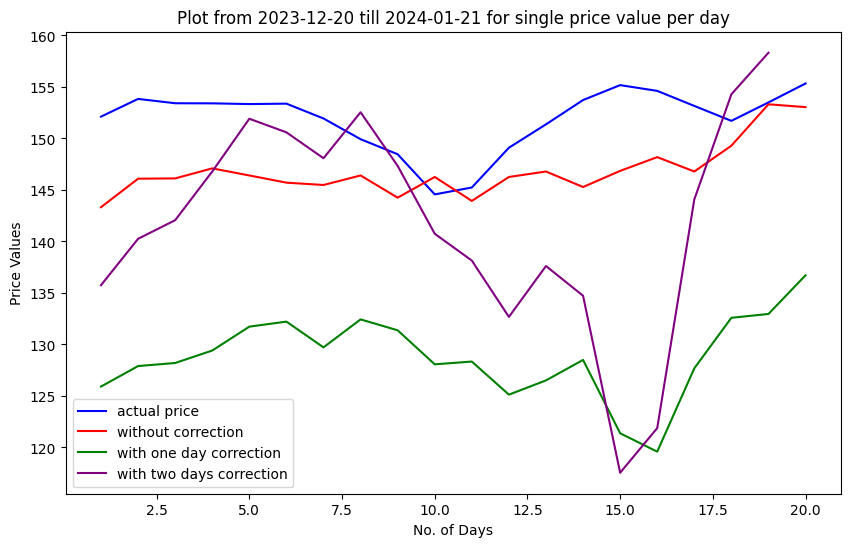

In [150]:
plt.figure(figsize=(10,6))
plt.title(f'Plot from {start} till {end} for single price value per day')
plt.xlabel('No. of Days')
plt.ylabel('Price Values')
plt.plot(day_actual, actual_data, label = 'actual price', color='blue')
plt.plot(day_without, pred_without_correction, label = 'without correction', color='red')
plt.plot(day_with1Day, pred_1Day_correction, label = 'with one day correction', color='green')
plt.plot(day_with2Days, pred_2Days_correction, label = 'with two days correction', color='purple')
plt.legend()
plt.show()

In [151]:
print("Without Correction Data:\n",pred_without_correction,"\n")
print("With One Day Correction:\n",pred_1Day_correction,"\n")
print("With Two Day Correction:\n",pred_2Days_correction,"\n")
print("Actual Data:\n",actual_data,"\n")

Without Correction Data:
 [143.32574138 146.09358661 146.12309316 147.09702273 146.40845357
 145.70971686 145.48329127 146.40845357 144.2521773  146.26086391
 143.93686207 146.26086391 146.79212409 145.28638647 146.85114431
 148.18825987 146.79212409 149.29830948 153.31829397 153.0441328 ] 

With One Day Correction:
 [[125.91328430175781], [127.90315246582031], [128.2012176513672], [129.41136169433594], [131.72869873046875], [132.21864318847656], [129.71823120117188], [132.4337921142578], [131.3751983642578], [128.07208251953125], [128.3402557373047], [125.126953125], [126.51052856445312], [128.49913024902344], [121.37818908691406], [119.59034729003906], [127.68446350097656], [132.59010314941406], [132.96075439453125], [136.7180633544922]] 

With Two Day Correction:
 [[135.754638671875], [140.2580108642578], [142.0655517578125], [146.7908477783203], [151.91580200195312], [150.594970703125], [148.08096313476562], [152.54734802246094], [147.33953857421875], [140.74896240234375], [138.145

In [152]:
def get_control_vector(val):
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    inv = []
    curr_val = 1000
    inds = np.where(controls)[0]
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
        
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv

In [153]:
controls_actual = get_control_vector(actual_data)
amount_actual = buy_and_sell_bot(actual_data, controls_actual)

In [154]:
controls_pred= get_control_vector(pred_without_correction)
amount_pred = buy_and_sell_bot(pred_without_correction, controls_pred)

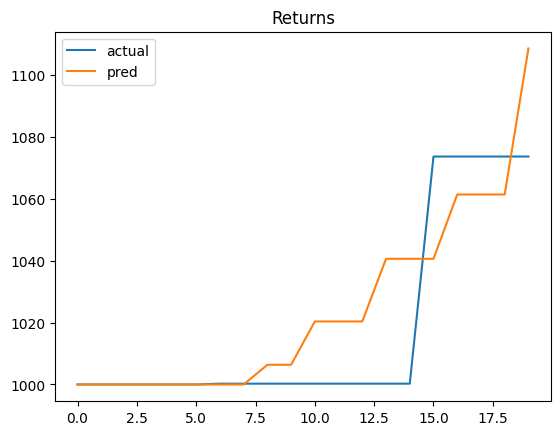

In [155]:
plt.plot(amount_actual, label="actual")
plt.plot(amount_pred, label="pred")
plt.legend()
plt.title("Returns")
plt.show()